In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tangram as tg 
import numpy as np 

In [2]:
#Spatial data 
dataFolder='./spdata/'

ad_spatial=sc.read(dataFolder+'gene_by_cell.csv').transpose()
ad_spatial.var_names_make_unique()

In [4]:
ad_spatial

AnnData object with n_obs × n_vars = 7416 × 241

In [3]:
#Single cell data 
ad_sc1=sc.read_h5ad('scdata/SI_adata_paper.h5ad')
ad_sc2=sc.read_h5ad('scdata/scTransform_singleCell_SI.h5ad')
ad_sc3=sc.read_h5ad('scdata/HVG_SI_adata_paper.h5ad')

print(ad_sc1)
print('\n',ad_sc2)
print('\n',ad_sc3)

AnnData object with n_obs × n_vars = 2239 × 18573
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'predicted_doublet', 'doublet_score', 'Phenograph_cluster_k15_dbRM', 'coarse_cluster_dbRM', 'cell_state'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'Phenograph_cluster_k15_dbRM_colors', 'cell_state_colors', 'coarse_cluster_dbRM_colors', 'dendrogram_Phenograph_cluster_k15_dbRM', 'hvg', 'neighbors', 'pca', 'test_elbo', 'test_epoch', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

 AnnData object with n_obs × n_vars = 2239 × 186
    obs: 'umi_sct', 'log_umi_sct', 'gene_sct', 'log_gene_sct', 'umi_per_gene_sct', 'log_umi_per_gene_sct'
    var: 'Inter

In [4]:
#merge data after applying tangram 
ad_tangram=sc.read_h5ad(dataFolder+'sc_genes_spatial_cell.h5ad')

In [5]:
# cell by gene matrix 
print(ad_spatial.shape) 
print(ad_sc.shape)
print(ad_tangram.shape)

(7416, 241)
(7216, 15971)
(7416, 15971)


In [4]:
coordinates = pd.read_csv(dataFolder+"tissue_positions_list.csv", index_col=0,header=None)
#counts = sc.read_csv("./pnas.1912459116.sd12.csv").transpose()
#adata_merfish = counts[coordinates.index, :]
ad_spatial.obsm["spatial"] = coordinates.to_numpy()
#ad_tangram.obsm["spatial"] = coordinates.to_numpy()

In [5]:
#load the already clusterd and cell type name file 

cluster= pd.read_csv(dataFolder+'K20/deg_annotation_spatial_cluster.dat',sep=',',index_col=0,header=0)
ctname=pd.read_csv(dataFolder+'K20/deg_annotation_spatial_cluster_celltype_name.dat',sep=',',index_col=0,header=None)
ctname_20deg=ctname.to_numpy()[:,0]
cluster_20deg=cluster.to_numpy()

cluster= pd.read_csv(dataFolder+'K20/dist_annotation_spatial_cluster.dat',sep=',',index_col=0,header=0)
ctname=pd.read_csv(dataFolder+'K20/dist_annotation_spatial_cluster_celltype_name.dat',sep=',',index_col=0,header=None)
ctname_20dist=ctname.to_numpy()[:,0]
cluster_20dist=cluster.to_numpy()

######
cluster= pd.read_csv(dataFolder+'K50/deg_annotation_spatial_cluster.dat',sep=',',index_col=0,header=0)
ctname=pd.read_csv(dataFolder+'K50/deg_annotation_spatial_cluster_celltype_name.dat',sep=',',index_col=0,header=None)
ctname_50deg=ctname.to_numpy()[:,0]
cluster_50deg=cluster.to_numpy()

cluster= pd.read_csv(dataFolder+'K50/dist_annotation_spatial_cluster.dat',sep=',',index_col=0,header=0)
ctname=pd.read_csv(dataFolder+'K50/dist_annotation_spatial_cluster_celltype_name.dat',sep=',',index_col=0,header=None)
ctname_50dist=ctname.to_numpy()[:,0]
cluster_50dist=cluster.to_numpy()

#####

cluster= pd.read_csv(dataFolder+'K100/deg_annotation_spatial_cluster.dat',sep=',',index_col=0,header=0)
ctname=pd.read_csv(dataFolder+'K100/deg_annotation_spatial_cluster_celltype_name.dat',sep=',',index_col=0,header=None)
ctname_100deg=ctname.to_numpy()[:,0]
cluster_100deg=cluster.to_numpy()

cluster= pd.read_csv(dataFolder+'K100/dist_annotation_spatial_cluster.dat',sep=',',index_col=0,header=0)
ctname=pd.read_csv(dataFolder+'K100/dist_annotation_spatial_cluster_celltype_name.dat',sep=',',index_col=0,header=None)
ctname_100dist=ctname.to_numpy()[:,0]
cluster_100dist=cluster.to_numpy()



In [6]:
cluster_20deg

array([[16],
       [17],
       [ 9],
       ...,
       [19],
       [16],
       [15]])

In [9]:
ad_spatial.obs['knownClusters_20deg'] = cluster_20deg.astype(str)
ad_spatial.obs['knownClusters_20deg'] = ad_spatial.obs['knownClusters_20deg'].astype('category')
ad_spatial.obs['knownClusters_20deg'] = ad_spatial.obs['knownClusters_20deg'].cat.rename_categories(ctname_20deg)
########
ad_spatial.obs['knownClusters_20dist'] = cluster_20dist.astype(str)
ad_spatial.obs['knownClusters_20dist'] = ad_spatial.obs['knownClusters_20dist'].astype('category')
ad_spatial.obs['knownClusters_20dist'] = ad_spatial.obs['knownClusters_20dist'].cat.rename_categories(ctname_20dist)



ad_spatial.obs['knownClusters_50deg'] = cluster_50deg.astype(str)
ad_spatial.obs['knownClusters_50deg'] = ad_spatial.obs['knownClusters_50deg'].astype('category')
ad_spatial.obs['knownClusters_50deg'] = ad_spatial.obs['knownClusters_50deg'].cat.rename_categories(ctname_50deg)
########
ad_spatial.obs['knownClusters_50dist'] = cluster_50dist.astype(str)
ad_spatial.obs['knownClusters_50dist'] = ad_spatial.obs['knownClusters_50dist'].astype('category')
ad_spatial.obs['knownClusters_50dist'] = ad_spatial.obs['knownClusters_50dist'].cat.rename_categories(ctname_50dist)


ad_spatial.obs['knownClusters_100deg'] = cluster_100deg.astype(str)
ad_spatial.obs['knownClusters_100deg'] = ad_spatial.obs['knownClusters_100deg'].astype('category')
ad_spatial.obs['knownClusters_100deg'] = ad_spatial.obs['knownClusters_100deg'].cat.rename_categories(ctname_100deg)
########
ad_spatial.obs['knownClusters_100dist'] = cluster_100dist.astype(str)
ad_spatial.obs['knownClusters_100dist'] = ad_spatial.obs['knownClusters_100dist'].astype('category')
ad_spatial.obs['knownClusters_100dist'] = ad_spatial.obs['knownClusters_100dist'].cat.rename_categories(ctname_100dist)



#ad_tangram.obs['knownClusters'] = cluster.astype(str)


#print('ct name',new_cluster_names)

In [10]:
sc.pp.normalize_total(ad_spatial, inplace=True)
sc.pp.log1p(ad_spatial)

#sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)
#sc.pl.highly_variable_genes(adata,show=False,save='.png')

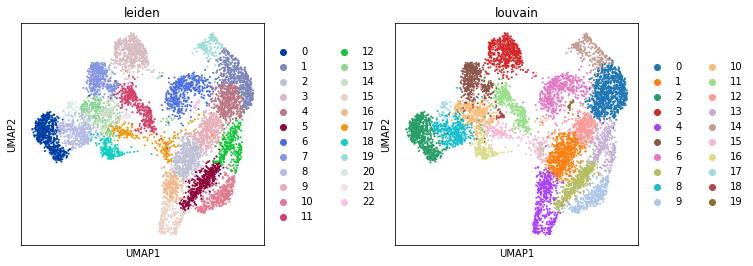

In [11]:
sc.pp.pca(ad_spatial)
sc.pp.neighbors(ad_spatial)
sc.tl.umap(ad_spatial)
sc.tl.leiden(ad_spatial, resolution=1.5)
sc.tl.louvain(ad_spatial,resolution=1.5)


plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(ad_spatial, color=["leiden","louvain"], wspace=0.4,show=True, save='_spatial_leiden_louvain.png')



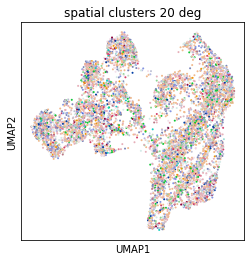

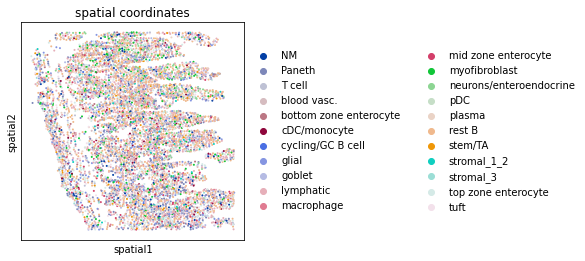

In [14]:
sc.pl.umap(ad_spatial, color="knownClusters_20deg",title='spatial clusters 20 deg',
           show=True,legend_loc='off data',save='_spatial_20deg.png')
sc.pl.embedding(ad_spatial, basis="spatial", color="knownClusters_20deg",title='spatial coordinates')

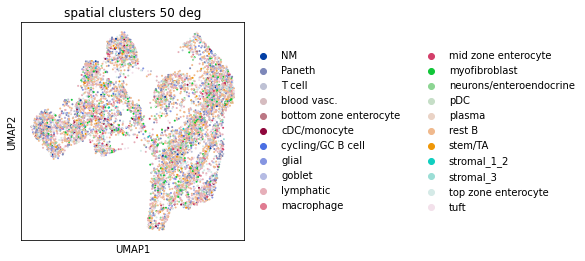

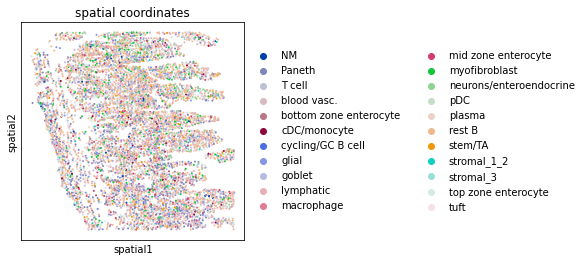

In [15]:
sc.pl.umap(ad_spatial, color="knownClusters_50deg",title='spatial clusters 50 deg',
           show=True,save='_spatial_50deg.png')
sc.pl.embedding(ad_spatial, basis="spatial", color="knownClusters_50deg",title='spatial coordinates')

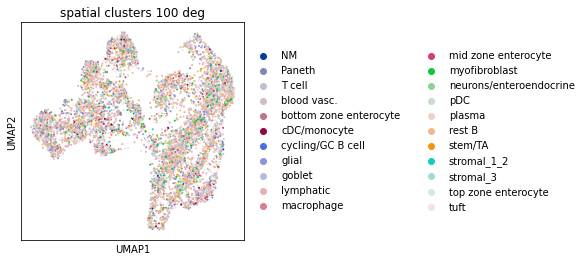

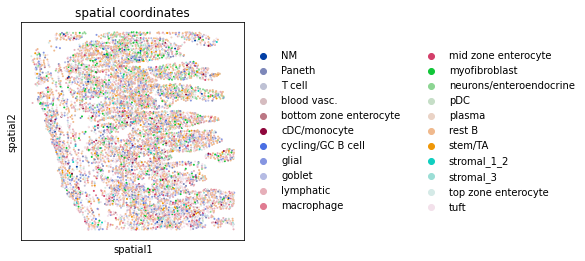

In [16]:
sc.pl.umap(ad_spatial, color="knownClusters_100deg",title='spatial clusters 100 deg',
           show=True,save='_spatial_100deg.png')
sc.pl.embedding(ad_spatial, basis="spatial", color="knownClusters_100deg",title='spatial coordinates')

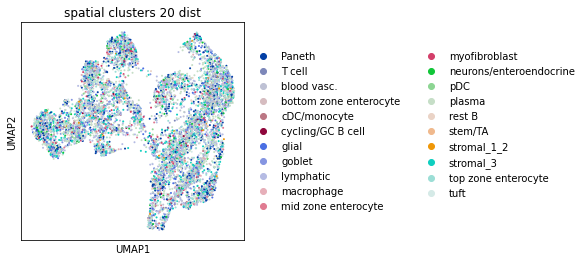

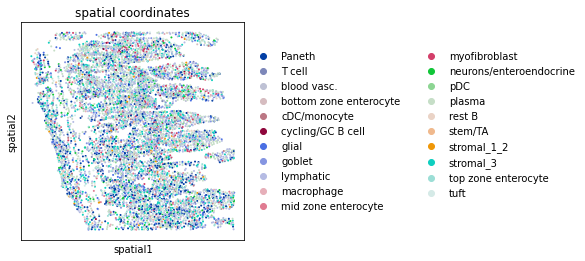

In [17]:
sc.pl.umap(ad_spatial, color="knownClusters_20dist",title='spatial clusters 20 dist',
           show=True,save='_spatial_20dist.png')
sc.pl.embedding(ad_spatial, basis="spatial", color="knownClusters_20dist",title='spatial coordinates')

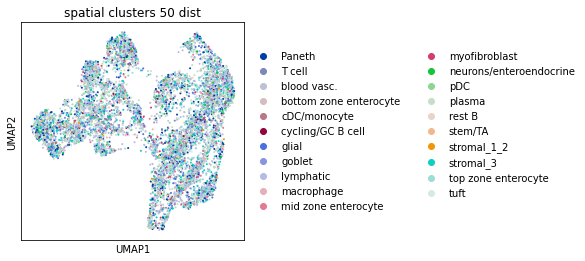

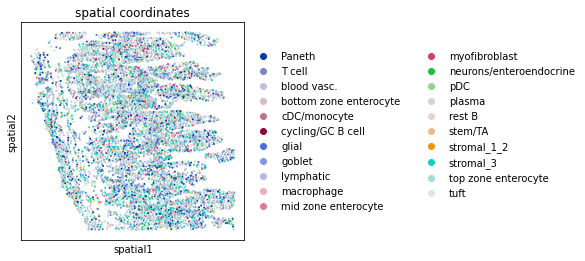

In [18]:
sc.pl.umap(ad_spatial, color="knownClusters_50dist",title='spatial clusters 50 dist',
           show=True,save='_spatial_50dist.png')
sc.pl.embedding(ad_spatial, basis="spatial", color="knownClusters_50dist",title='spatial coordinates')

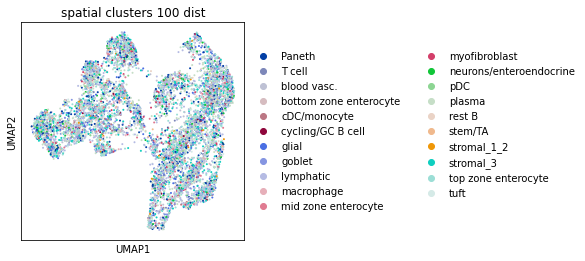

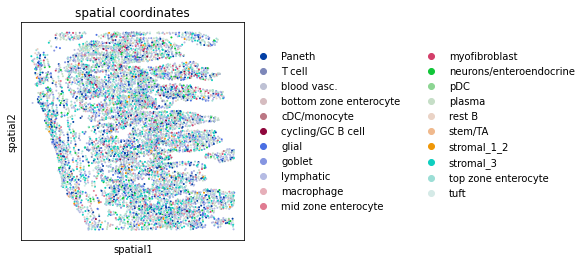

In [19]:
sc.pl.umap(ad_spatial, color="knownClusters_100dist",title='spatial clusters 100 dist',
           show=True,save='_spatial_100dist.png')
sc.pl.embedding(ad_spatial, basis="spatial", color="knownClusters_100dist",title='spatial coordinates')

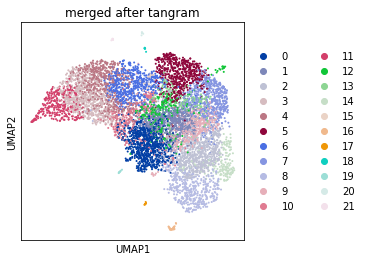

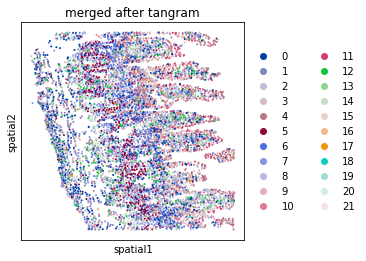

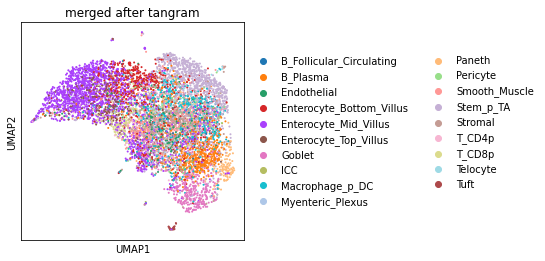

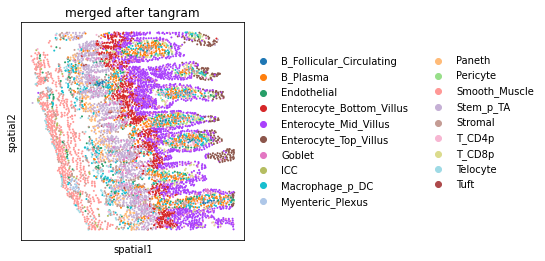

In [12]:
sc.pp.normalize_total(ad_tangram, inplace=True)
sc.pp.log1p(ad_tangram)

sc.pp.pca(ad_tangram)
sc.pp.neighbors(ad_tangram)
sc.tl.umap(ad_tangram)
sc.tl.leiden(ad_tangram, key_added="leiden")

sc.pl.umap(ad_tangram, color=["leiden"],wspace=0.4,show=True,title='merged after tangram',save='_merged_leiden.png')
sc.pl.embedding(ad_tangram, basis="spatial", color="leiden",title='merged after tangram')


ad_tangram.obs['knownClusters'] = ad_tangram.obs['knownClusters'].cat.rename_categories(new_cluster_names)
sc.pl.umap(ad_tangram, color=['knownClusters'],wspace=0.4,show=True,title='merged after tangram',save='_merged_known_clusters.png')
sc.pl.embedding(ad_tangram, basis="spatial", color="knownClusters",title='merged after tangram')

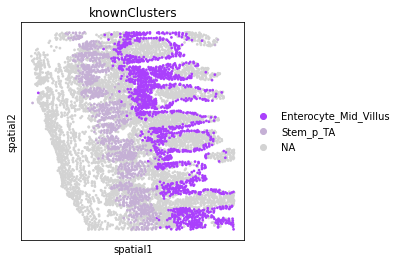

In [14]:
sc.pl.embedding(ad_spatial, basis='spatial',color="knownClusters", groups=["Enterocyte_Mid_Villus", "Stem_p_TA"], alpha=1,size=30)


In [15]:
genesum=np.sum(ad_spatial.X,axis=0)
genemean=np.mean(ad_spatial.X,axis=0)
cellsum=np.sum(ad_spatial.X,axis=1)
print(genesum.shape,genemean.shape,cellsum.shape)
#df=pd.DataFrame(data=adata.X.transpose(), index=adata.var_names , columns=adata.obs_names)
#df.to_csv("xxoutput_filter_"+filename+".csv")
cellname=ad_spatial.obs_names.to_numpy()
genename_spatial=ad_spatial.var_names.to_numpy()
genename_merged=ad_tangram.var_names.to_numpy()

#genename=genename.reshape((len(genename),1))

index=np.argsort(-genesum)
#Top 20 gene sorted according to their mean expression in spatial data 
for i in range(20):
    print(genename_spatial[index[i]],genemean[index[i]])
    
  
#somehow tangram make all the gene name in lowercase letter 
genename_merged = [each_string.capitalize() for each_string in genename_merged]

common_genes=set(genename_spatial).intersection(set(genename_merged))

print('\n\ncommon',common_genes)

(241,) (241,) (7416,)
Neat1 1.4161657
Slc51a 0.9736351
Slc5a1 0.94674546
Txndc5 0.92952883
Clca3b 0.835351
Sdc1 0.81116843
Nlrp6 0.76421785
Cps1 0.74084425
Acta2 0.71616846
Vim 0.5810453
Apob 0.5692399
Maoa 0.55782557
H2-Eb1 0.5164484
Ifnar1 0.48109952
Net1 0.4795036
Fzd5 0.46253517
Lpar1 0.41800344
Cd44 0.39973825
Slc12a2 0.3623207
Tspan13 0.33458102


common {'Il10', 'Tbx21', 'Cnr1', 'Net1', 'Hrh4', 'Gpr34', 'Lpar5', 'Lpar6', 'Ltb4r1', 'Cd8b1', 'Ptger1', 'Adrb1', 'Slc2a2', 'Prf1', 'Chrm3', 'S1pr2', 'Ms4a1', 'Tnfrsf21', 'Smo', 'Tspan13', 'Ffar2', 'Lct', 'Fzd8', 'Cd3e', 'Itgae', 'Tpsb2', 'Pzp', 'Txndc5', 'Plb1', 'Lrmp', 'Sox4', 'Gipr', 'Vim', 'Ffar4', 'Cd79b', 'Klk1', 'Chrm1', 'Glp1r', 'Hrh2', 'Fzd1', 'Galr1', 'Adgrd1', 'Cxcr5', 'Il7r', 'Lamp3', 'Trpm5', 'Sstr3', 'Sstr2', 'Cd34', 'Nlrp6', 'Adgrf5', 'Ifnar1', 'Tbxa2r', 'Cd27', 'Tm4sf4', 'Cysltr1', 'Slc51a', 'Adrb2', 'S1pr4', 'Scn3a', 'Avil', 'Adra2a', 'Fzd2', 'Neurog3', 'Nt5e', 'Fzd3', 'Cysltr2', 'Ada', 'Clca3b', 'Rcor2', 'Elavl3', 'Hrh

In [16]:
new_cluster_names

array(['B_Follicular_Circulating', 'B_Plasma', 'Endothelial',
       'Enterocyte_Bottom_Villus', 'Enterocyte_Mid_Villus',
       'Enterocyte_Top_Villus', 'Goblet', 'ICC', 'Macrophage_p_DC',
       'Myenteric_Plexus', 'Paneth', 'Pericyte', 'Smooth_Muscle',
       'Stem_p_TA', 'Stromal', 'T_CD4p', 'T_CD8p', 'Telocyte', 'Tuft'],
      dtype=object)

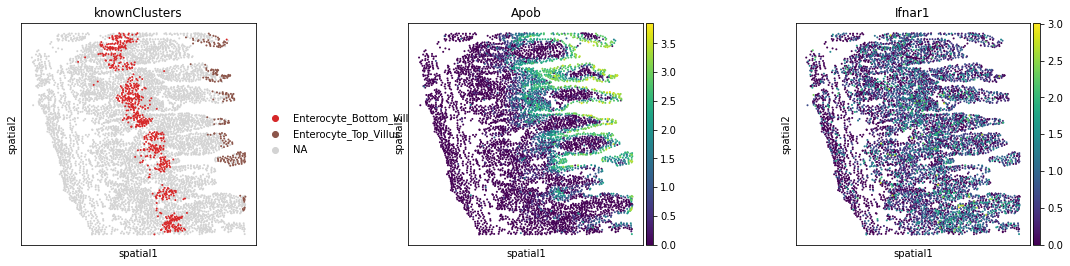

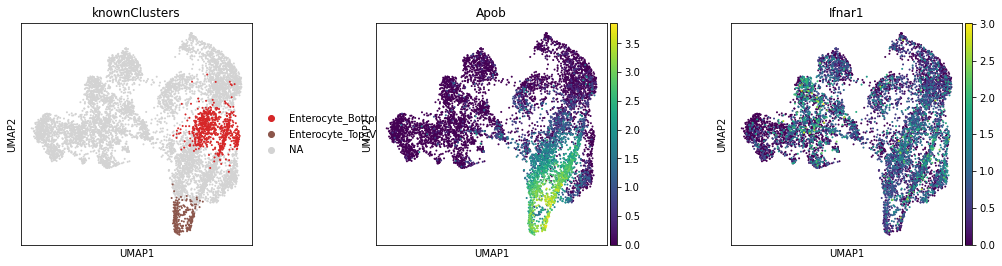

In [17]:
#plot genes and cell types on spatial data 
sc.pl.embedding(ad_spatial, basis='spatial',wspace=0.5,
color=["knownClusters", "Apob","Ifnar1" ],
groups=["Enterocyte_Bottom_Villus", "Enterocyte_Top_Villus"
])

sc.pl.umap(ad_spatial, color=["knownClusters", "Apob","Ifnar1" ],
wspace=0.4,show=True,
groups=["Enterocyte_Bottom_Villus", "Enterocyte_Top_Villus"
])

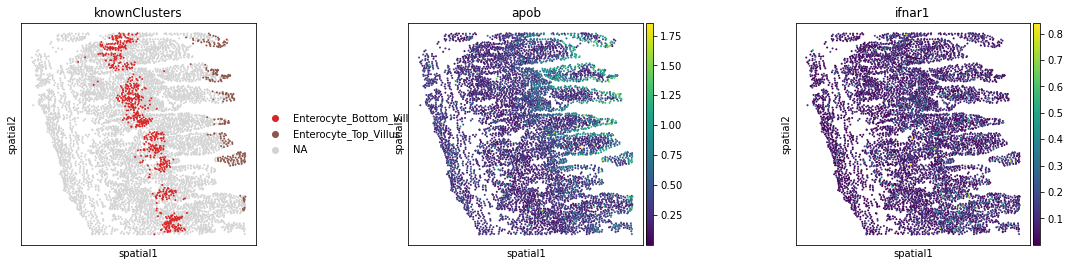

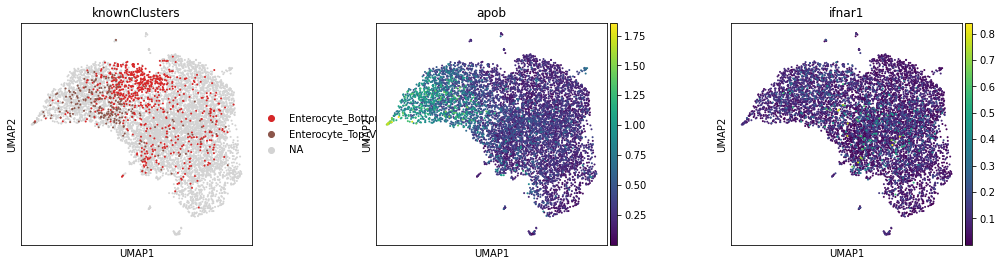

In [18]:
#plot genes and cell types on mapping merged data 
sc.pl.embedding(ad_tangram, basis='spatial',wspace=0.5,
color=["knownClusters", "apob","ifnar1" ],
groups=["Enterocyte_Bottom_Villus", "Enterocyte_Top_Villus"
])

sc.pl.umap(ad_tangram, color=["knownClusters", "apob","ifnar1" ],
wspace=0.4,show=True,
groups=["Enterocyte_Bottom_Villus", "Enterocyte_Top_Villus"
])


In [19]:
ad_spatial.write_h5ad(dataFolder+'saveall_spatial')
ad_tangram.write_h5ad(dataFolder+'saveall_merged')